## Import Necessary Packages

In [1]:
import glob
import numpy as np
import xarray as xr
import proplot as pplt
import warnings
warnings.filterwarnings('ignore')

## User-Defined Fields

In [2]:
path  = # 'directory/where/small/domain/files/are/located/'
cases = ['nz_32','nz_64','nz_128','nz_256']
nx = 128
ny = 128

## Plot Fig. 3

For each case, load and plot ice water path $IWP$, precipitable water $PW$, net radiative heating rate (from shortwave and longwave heating rates $Q_{SW}$ and  $Q_{LW}$, respectively), the surface enthalpy flux $SEF$ (from surface latent and sensible heat fluxes $LHF$ and $SHF$, respectively), and the spatial variance of  column frozen moist static energy $\langle h_f \rangle'$.

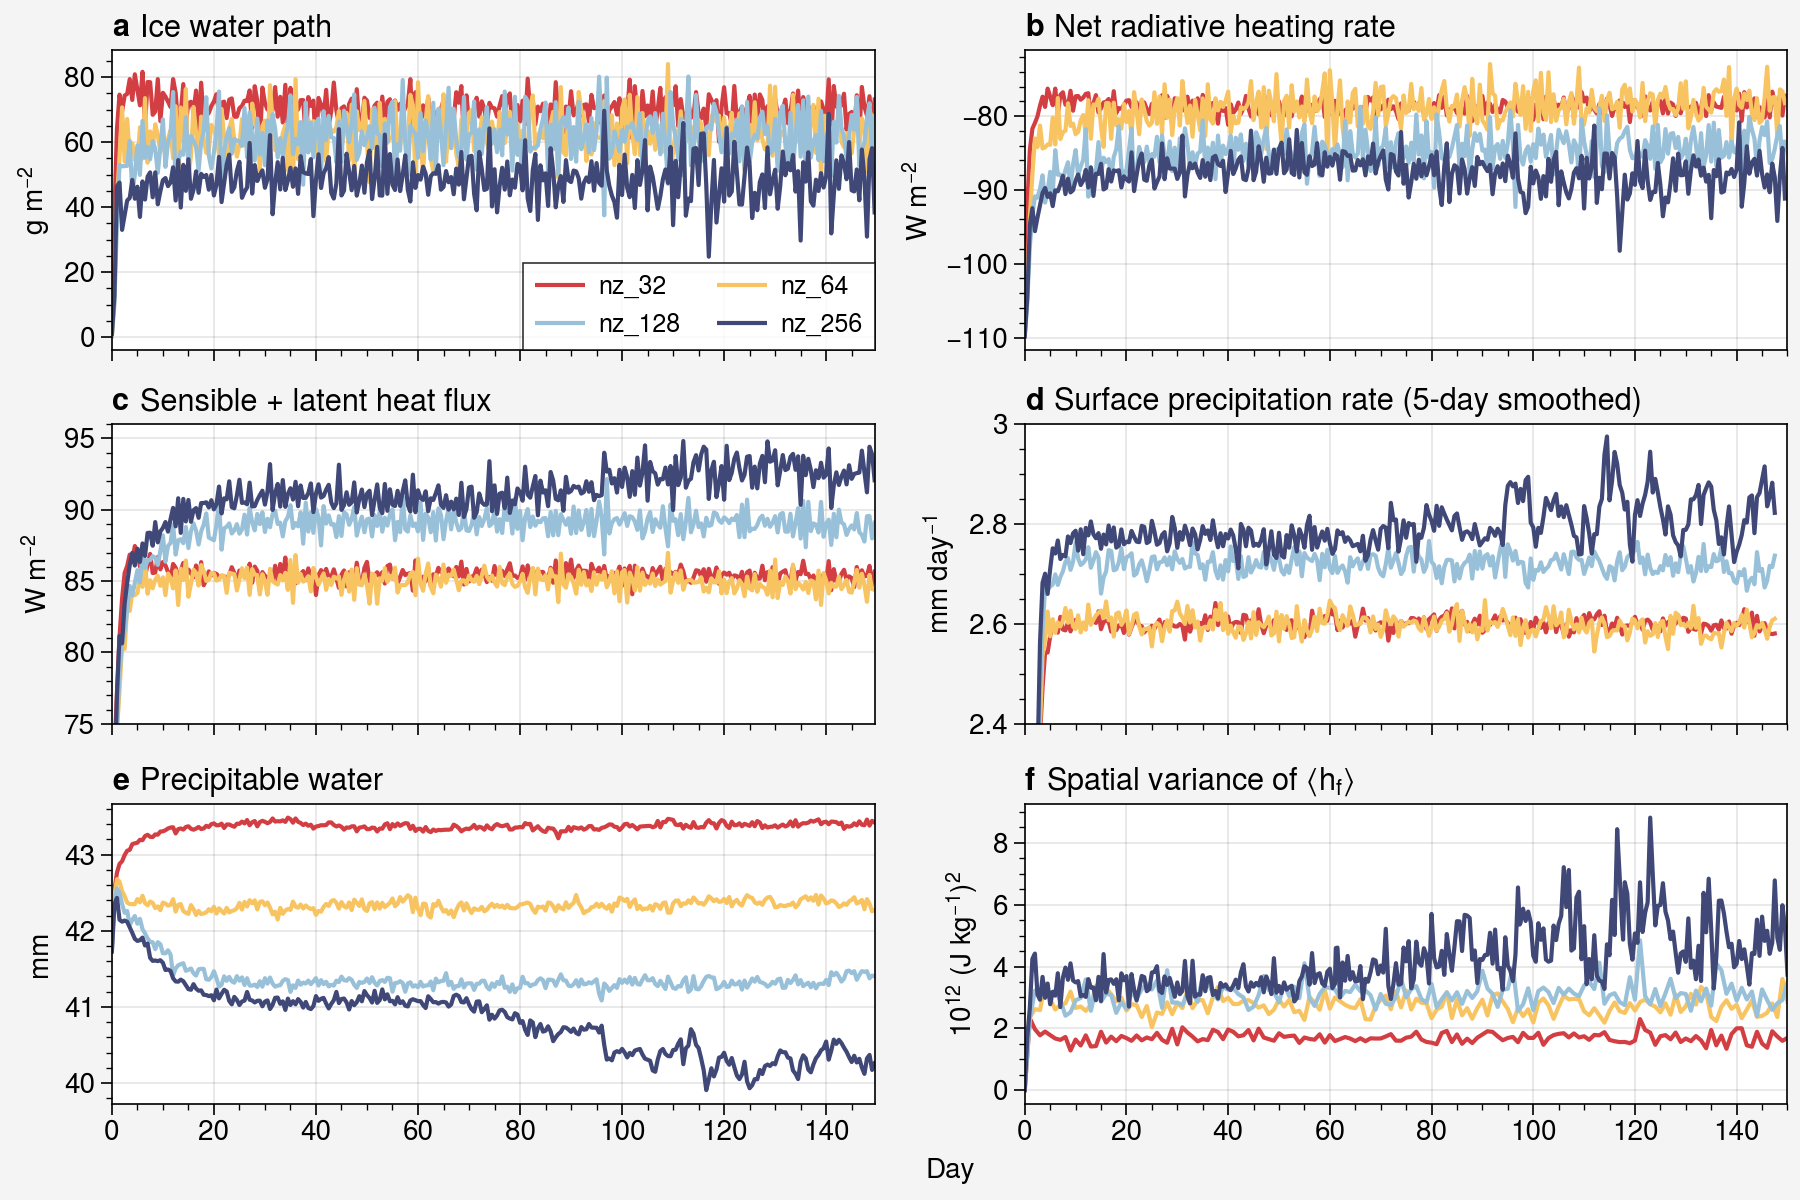

In [14]:
cmap    = np.asarray([[211,62,67,255],[248,196,98,255],[152,193,217,255],[64,72,119,255]])/255
fig,axs = pplt.subplots(nrows=3,ncols=2,sharex=3,sharey=0,width=9,height=6)
axs.format(fontsize=10,abc=True,titleloc='l')
axs[0].format(xlabel='Day',title='Ice water path',ylabel='g m$^{-2}$') 
axs[1].format(title='Net radiative heating rate',ylabel='W m$^{-2}$') 
axs[2].format(title='Sensible + latent heat flux',ylabel='W m$^{-2}$',ylim=(75,96)) 
axs[3].format(title='Surface precipitation rate (5-day smoothed)',ylabel='mm day$^{-1}$', ylim=(2.4,3)) 
axs[4].format(title='Precipitable water',ylabel='mm') 
axs[5].format(title='Spatial variance of ' + r'$\langle h_f \rangle$',ylabel='10$^{12}$ (J kg$^{-1}$)$^2$')
for i,case in enumerate(cases):
    ## Open Dataset and Resample Timesteps to 6 Mean
    ds = xr.open_dataset(glob.glob(path+case+'/OUT_STAT/*.nc')[0])
    integerdays = np.floor(ds.time*2)/2
    ds = ds.groupby(integerdays).mean('time')
    ## Load and Plot IWP
    iwp = ds.IWP.load()
    axs[0].plot(iwp.time,iwp,color=cmap[i],label=case)
    ## Calculate and Plot Net Radiative Heating
    qsw = (ds.SWNTOA-ds.SWNS).load()
    qlw = (ds.LWNS-ds.LWNTOA).load()
    qnet = qsw+qlw
    axs[1].plot(qnet.time,qnet,color=cmap[i])
    ## Load and Plot SEF
    sef = (ds.SHF+ds.LHF).load()
    axs[2].plot(sef.time,sef,color=cmap[i])
    ## Load and Plot 5-Day Smoothed Surface Preciptation
    pr5day = ds.PREC.rolling(center=True,time=10).mean()
    axs[3].plot(pr5day.time,pr5day,color=cmap[i])
    ## Load and Plot PW
    pw = ds.PW.load()
    axs[4].plot(pw.time,pw,color=cmap[i])
    ## Calculate and Plot Spatial Variance of Column FMSE
    hffiles = np.sort(glob.glob(path+case+'/OUT_3D/FMSE/*.nc'))
    hf = xr.open_mfdataset(hffiles).fmse_vint
    hfvar = hf.var(dim=('x','y')).load()
    axs[5].plot(hfvar.time,1e-12*hfvar,color=cmap[i])
axs[0].legend(loc='lr',ncols=2)